# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from pprint import pprint
import datetime


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#print(cities)

614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Set up link for api call
url = "http://api.openweathermap.org/data/2.5/weather?"
#link = f"{link}appid={weather_api_key}&units=metric&q="
#Set up lists to hold data
location = []
clouds = []
country = []
date = []
humidity = []
lats = []
lngs = []
max_temp = []
wind = []

units = "metric"
#set organisational variables
count = 0
current_set = 1
#collect data and store in lists
print("Beginning Data Retrieval\n-----------------------------")
for city in cities:
    try:
        link = f"{url}appid={weather_api_key}&q={city}&units={units}"
        data = requests.get(link).json()
        location.append(data["name"])
        clouds.append(data["clouds"]["all"])
        country.append(data["sys"]["country"])
        date.append(datetime.date.fromtimestamp(data["dt"]))
        humidity.append(data["main"]["humidity"])
        lats.append(data["coord"]["lat"])
        lngs.append(data["coord"]["lon"])
        max_temp.append(data["main"]["temp_max"])
        wind.append(data["wind"]["speed"])
        #print(city)
        if count > 49:
            count = 1
            current_set += 1
        else:
            count += 1
        print(f"Processing record {count} of set {current_set} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

Beginning Data Retrieval
-----------------------------
Processing record 1 of set 1 | strangnas
Processing record 2 of set 1 | mataura
Processing record 3 of set 1 | qaqortoq
Processing record 4 of set 1 | ushuaia
Processing record 5 of set 1 | hermanus
Processing record 6 of set 1 | luderitz
Processing record 7 of set 1 | port lincoln
Processing record 8 of set 1 | saskylakh
Processing record 9 of set 1 | warah
Processing record 10 of set 1 | soloneshnoye
Processing record 11 of set 1 | beidao
Processing record 12 of set 1 | thompson
Processing record 13 of set 1 | komsomolskiy
Processing record 14 of set 1 | rikitea
Processing record 15 of set 1 | bluff
Processing record 16 of set 1 | fortuna
Processing record 17 of set 1 | tomatlan
Processing record 18 of set 1 | georgetown
City not found. Skipping...
Processing record 19 of set 1 | provideniya
City not found. Skipping...
Processing record 20 of set 1 | tilichiki
Processing record 21 of set 1 | whitehorse
Processing record 22 of set

Processing record 37 of set 4 | wanaka
City not found. Skipping...
Processing record 38 of set 4 | bilibino
Processing record 39 of set 4 | chiapilla
Processing record 40 of set 4 | grindavik
Processing record 41 of set 4 | tapes
Processing record 42 of set 4 | nyimba
Processing record 43 of set 4 | northam
Processing record 44 of set 4 | yulara
Processing record 45 of set 4 | juneau
Processing record 46 of set 4 | kruisfontein
Processing record 47 of set 4 | ushtobe
Processing record 48 of set 4 | gat
Processing record 49 of set 4 | litovko
Processing record 50 of set 4 | senanga
Processing record 1 of set 5 | margate
Processing record 2 of set 5 | salta
Processing record 3 of set 5 | tessalit
Processing record 4 of set 5 | denpasar
Processing record 5 of set 5 | gujan-mestras
Processing record 6 of set 5 | mahibadhoo
Processing record 7 of set 5 | potrero grande
Processing record 8 of set 5 | bathsheba
Processing record 9 of set 5 | kodiak
Processing record 10 of set 5 | victoria
Pro

Processing record 20 of set 8 | nyurba
Processing record 21 of set 8 | makokou
Processing record 22 of set 8 | haines junction
Processing record 23 of set 8 | zhigansk
Processing record 24 of set 8 | stribro
Processing record 25 of set 8 | bartlesville
Processing record 26 of set 8 | basco
Processing record 27 of set 8 | dok kham tai
Processing record 28 of set 8 | westport
Processing record 29 of set 8 | berja
Processing record 30 of set 8 | matagami
Processing record 31 of set 8 | lincoln
City not found. Skipping...
Processing record 32 of set 8 | sijunjung
Processing record 33 of set 8 | claremore
Processing record 34 of set 8 | yar-sale
Processing record 35 of set 8 | nichinan
Processing record 36 of set 8 | beloha
Processing record 37 of set 8 | itoman
Processing record 38 of set 8 | brae
Processing record 39 of set 8 | sao joao da barra
Processing record 40 of set 8 | antofagasta
Processing record 41 of set 8 | mutoko
Processing record 42 of set 8 | porbandar
Processing record 43

Processing record 13 of set 12 | miraflores
Processing record 14 of set 12 | maniitsoq
------------------------------
Data Retrieval Complete
------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [23]:
#dictonary

df = {
    "City" : location,
    "Cloudiness" : clouds,
    "Country" : country,
    "Date" : date,
    "Humidity" : humidity,
    "Latitude" : lats,
    "Longitude": lngs,
    "Max Temperature": max_temp,
    "Wind Speed": wind
}


df = pd.DataFrame(df)
df.count()

City               564
Cloudiness         564
Country            564
Date               564
Humidity           564
Latitude           564
Longitude          564
Max Temperature    564
Wind Speed         564
dtype: int64

In [24]:
df.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
0,Strängnäs,47,SE,2021-04-17,80,59.3774,17.0312,3.33,2.57
1,Mataura,70,NZ,2021-04-17,74,-46.1927,168.8643,15.00,3.58
2,Qaqortoq,0,GL,2021-04-17,50,60.7167,-46.0333,-5.00,1.54
3,Ushuaia,40,AR,2021-04-17,54,-54.8000,-68.3000,12.00,4.12
4,Hermanus,0,ZA,2021-04-17,33,-34.4187,19.2345,20.56,0.89


In [25]:
df.to_csv("../output_data/weather_data.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
impossible = 0
k = 100
for humidities in humidity :
    
    impossible = impossible + (humidities > k)
    #print(humidities)

print(impossible)

0


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

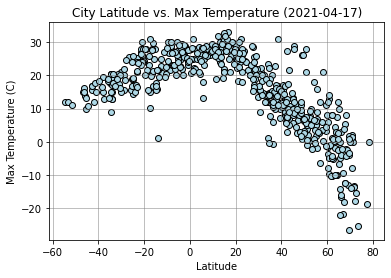

In [27]:
#y is max temp
#x is latitude
#title is "City Latitude vs. Max Temperature {date}"
plt.scatter(lats, max_temp, marker = "o", facecolors = "lightblue", edgecolors="black")
plt.title(f"City Latitude vs. Max Temperature ({date[1]})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(color='gray', linestyle='-', linewidth=.5)
plt.savefig("../output_data/lat vs temp")

## Latitude vs. Humidity Plot

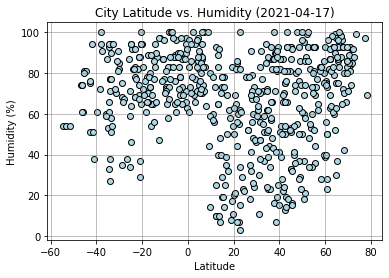

In [30]:
#code for scatter plot
plt.scatter(lats, humidity, marker = "o", facecolors = "lightblue", edgecolors="black")
plt.title(f"City Latitude vs. Humidity ({date[1]})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(color='gray', linestyle='-', linewidth=.5)
plt.savefig("../output_data/lat vs Hum")

## Latitude vs. Cloudiness Plot

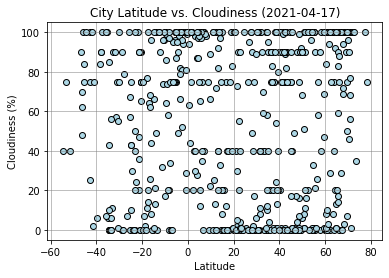

In [29]:
#scatter plot
plt.scatter(lats, clouds, marker = "o", facecolors = "lightblue", edgecolors="black")
plt.title(f"City Latitude vs. Cloudiness ({date[1]})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(color='gray', linestyle='-', linewidth=.5)
plt.savefig("../output_data/lat vs Cloud")

## Latitude vs. Wind Speed Plot

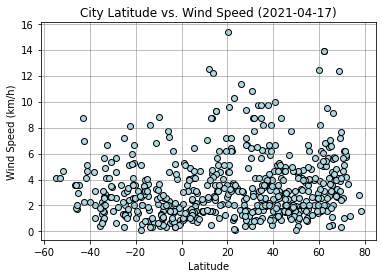

In [28]:
#scatter plot
plt.scatter(lats, wind, marker = "o", facecolors = "lightblue", edgecolors="black")
plt.title(f"City Latitude vs. Wind Speed ({date[1]})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (km/h)")
plt.grid(color='gray', linestyle='-', linewidth=.5)
plt.savefig("../output_data/lat vs wind")

## Linear Regression

In [14]:
#naming and creating an empty list for all the var i need
north = []
north_temp = []
north_hum = []
north_cloud=[]
north_wind = []
south = []
south_temp = []
south_hum = []
south_cloud = []
south_wind = []

temp_index = 0
#running a for loop to collect all the data and putting them into the empty list
for lati in lats :
    #print(lats)
    if lati > 0 :
        north.append(lati)
        north_temp.append(max_temp[temp_index])
        north_hum.append(humidity[temp_index])
        north_cloud.append(clouds[temp_index])
        north_wind.append(wind[temp_index])
        
    elif lati < 0 :
        south.append(lati)
        south_temp.append(max_temp[temp_index])
        south_hum.append(humidity[temp_index])
        south_cloud.append(clouds[temp_index])
        south_wind.append(wind[temp_index])
    temp_index +=1
#print(north)
#print(south)
#print(north_temp)
#print(south_temp)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Correlation between these two variables is -0.86


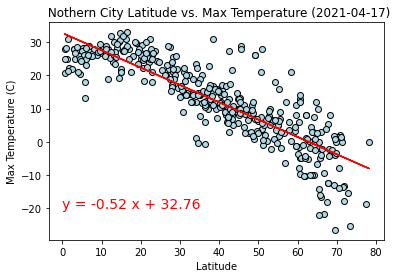

In [15]:
#scatter plot
plt.scatter(north, north_temp, marker = "o", facecolors = "lightblue", edgecolors="black")
plt.title(f" Nothern City Latitude vs. Max Temperature ({date[1]})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

(slope, intercept,rvalue, pvalue, stderr)= linregress(north,north_temp)
#converting north into special array for element wise operation
north = np.array(north)
#linear regression line
regress_values = north*slope + intercept
line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.plot(north, regress_values , color = 'red')

plt.annotate(line_eq,(0,-20), color='red', fontsize=14)
print(f"Correlation between these two variables is {round(rvalue,2)}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Correlation between these two variables is 0.68


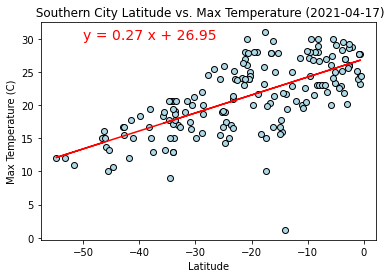

In [16]:
plt.scatter(south, south_temp, marker = "o", facecolors = "lightblue", edgecolors="black")
plt.title(f" Southern City Latitude vs. Max Temperature ({date[1]})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

(slope, intercept,rvalue, pvalue, stderr)= linregress(south,south_temp)
#converting north into special array for element wise operation
south = np.array(south)
regress_values = south*slope + intercept
line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.plot(south, regress_values , color = 'red')

plt.annotate(line_eq,(-50,30), color='red', fontsize=14)
print(f"Correlation between these two variables is {round(rvalue,2)}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Correlation between these two variables is 0.17


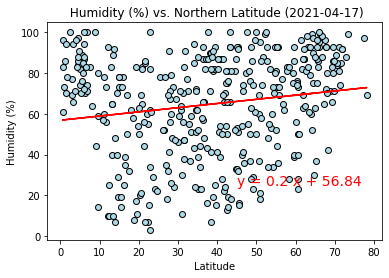

In [17]:
#made a template for ease
xvar = north
yvar = north_hum
title = f" Humidity (%) vs. Northern Latitude ({date[1]})"
xlab = "Latitude"
ylab = "Humidity (%)"
xlo = 45
ylo = 25

plt.scatter(xvar, yvar, marker = "o", facecolors = "lightblue", edgecolors="black")
plt.title(title)
plt.xlabel(xlab)
plt.ylabel(ylab)

(slope, intercept,rvalue, pvalue, stderr)= linregress(xvar,yvar)
#converting north into special array for element wise operation
xvar = np.array(xvar)
regress_values = xvar*slope + intercept
line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.plot(xvar, regress_values , color = 'red')

plt.annotate(line_eq,(xlo,ylo), color='red', fontsize=14)
print(f"Correlation between these two variables is {round(rvalue,2)}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Correlation between these two variables is 0.29


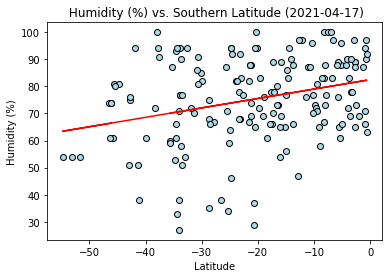

In [18]:
xvar = south
yvar = south_hum
title = f" Humidity (%) vs. Southern Latitude ({date[1]})"
xlab = "Latitude"
ylab = "Humidity (%)"
xlo = -55
ylo = 20

plt.scatter(xvar, yvar, marker = "o", facecolors = "lightblue", edgecolors="black")
plt.title(title)
plt.xlabel(xlab)
plt.ylabel(ylab)

(slope, intercept,rvalue, pvalue, stderr)= linregress(xvar,yvar)
#converting north into special array for element wise operation
xvar = np.array(xvar)
regress_values = xvar*slope + intercept
line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.plot(xvar, regress_values , color = 'red')

plt.annotate(line_eq,(xlo,ylo), color='red', fontsize=14)
print(f"Correlation between these two variables is {round(rvalue,2)}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Correlation between these two variables is 0.05


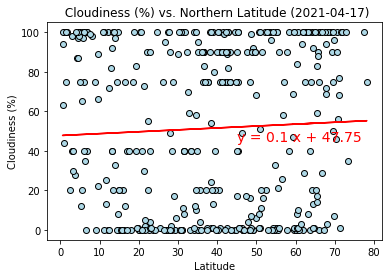

In [19]:
xvar = north
yvar = north_cloud
title = f" Cloudiness (%) vs. Northern Latitude ({date[1]})"
xlab = "Latitude"
ylab = "Cloudiness (%)"
xlo = 45
ylo = 45

plt.scatter(xvar, yvar, marker = "o", facecolors = "lightblue", edgecolors="black")
plt.title(title)
plt.xlabel(xlab)
plt.ylabel(ylab)

(slope, intercept,rvalue, pvalue, stderr)= linregress(xvar,yvar)
#converting north into special array for element wise operation
xvar = np.array(xvar)
regress_values = xvar*slope + intercept
line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.plot(xvar, regress_values , color = 'red')

plt.annotate(line_eq,(xlo,ylo), color='red', fontsize=14)
print(f"Correlation between these two variables is {round(rvalue,2)}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Correlation between these two variables is 0.22


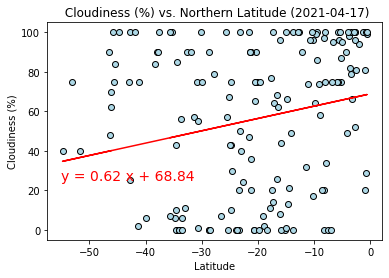

In [20]:
xvar = south
yvar = south_cloud
title = f" Cloudiness (%) vs. Northern Latitude ({date[1]})"
xlab = "Latitude"
ylab = "Cloudiness (%)"
xlo = -55
ylo = 25

plt.scatter(xvar, yvar, marker = "o", facecolors = "lightblue", edgecolors="black")
plt.title(title)
plt.xlabel(xlab)
plt.ylabel(ylab)

(slope, intercept,rvalue, pvalue, stderr)= linregress(xvar,yvar)
#converting north into special array for element wise operation
xvar = np.array(xvar)
regress_values = xvar*slope + intercept
line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.plot(xvar, regress_values , color = 'red')

plt.annotate(line_eq,(xlo,ylo), color='red', fontsize=14)
print(f"Correlation between these two variables is {round(rvalue,2)}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Correlation between these two variables is 0.07


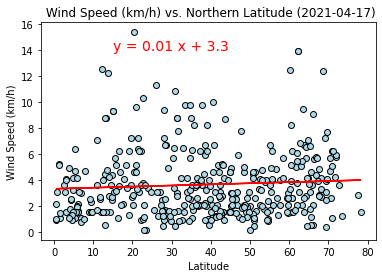

In [21]:
xvar = north
yvar = north_wind
title = f" Wind Speed (km/h) vs. Northern Latitude ({date[1]})"
xlab = "Latitude"
ylab = "Wind Speed (km/h)"
xlo = 15
ylo = 14

plt.scatter(xvar, yvar, marker = "o", facecolors = "lightblue", edgecolors="black")
plt.title(title)
plt.xlabel(xlab)
plt.ylabel(ylab)

(slope, intercept,rvalue, pvalue, stderr)= linregress(xvar,yvar)
#converting north into special array for element wise operation
xvar = np.array(xvar)
regress_values = xvar*slope + intercept
line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.plot(xvar, regress_values , color = 'red')

plt.annotate(line_eq,(xlo,ylo), color='red', fontsize=14)
print(f"Correlation between these two variables is {round(rvalue,2)}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Correlation between these two variables is -0.21


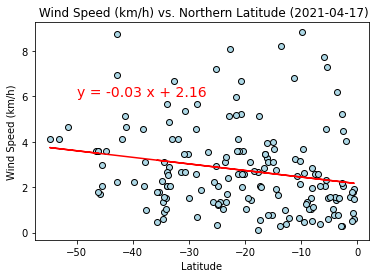

In [22]:
xvar = south
yvar = south_wind
title = f" Wind Speed (km/h) vs. Northern Latitude ({date[1]})"
xlab = "Latitude"
ylab = "Wind Speed (km/h)"
xlo = -50
ylo = 6

plt.scatter(xvar, yvar, marker = "o", facecolors = "lightblue", edgecolors="black")
plt.title(title)
plt.xlabel(xlab)
plt.ylabel(ylab)

(slope, intercept,rvalue, pvalue, stderr)= linregress(xvar,yvar)
#converting north into special array for element wise operation
xvar = np.array(xvar)
regress_values = xvar*slope + intercept
line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.plot(xvar, regress_values , color = 'red')

plt.annotate(line_eq,(xlo,ylo), color='red', fontsize=14)
print(f"Correlation between these two variables is {round(rvalue,2)}")